In [24]:
import numpy as np
import pandas as pd 

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
from keras.models import load_model
np.random.seed(0)
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [27]:
Train = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
Valid = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
Train = Train.map(lambda image,label:(rescale(image),label))
Valid  = Valid.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [28]:
#Loading Training and Test Dataset as Tensor
print("Number of training images: ",len(Train))
print("Number of validation images: ",len(Valid))

Number of training images:  2197
Number of validation images:  550


In [29]:
#Number of unique plants
import os
unique_plants = []
cl = os.listdir('../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
for i in cl:
    x = i.split('___')
    if x[0] not in unique_plants:
        unique_plants.append(x[0])
print("Number of Unique Plants: ",len(unique_plants))
print("Unique Plants: ",unique_plants)

Number of Unique Plants:  14
Unique Plants:  ['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']


In [30]:
#image, label  = Train[0]
#fig,(ax1) = plt.subplots(figsize=(15,5),nrows=1,ncols=1)
#ax1.imshow(image)
#ax1.set_title("original image")
#plt.show()#

In [31]:
def get_model():
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
    model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.MaxPooling2D(3,3))

    model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.MaxPooling2D(3,3))

    model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.MaxPooling2D(3,3))

    model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
    model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

    model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
    model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(1568,activation="relu"))
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(38,activation="softmax"))
    return model

In [32]:
optimizer=["Adam","RMSProp","Adadelta","Adagrad"]

In [33]:
from keras import backend as K
history=[]

ep = 5

print("Adam")
opt1 = keras.optimizers.Adam(learning_rate=0.0001)
model_Adam=get_model()
model_Adam.compile(optimizer=opt1,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#     model.summary()
history.append(model_Adam.fit_generator(Train,
          validation_data=Valid,
          epochs = ep))
model_Adam.save('model_Adam.h5')
K.clear_session()

print()
print("RMSprop")
opt2 = keras.optimizers.RMSprop(learning_rate=0.0001)
model_RMSprop=get_model()
model_RMSprop.compile(optimizer=opt2,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#     model.summary()
history.append(model_RMSprop.fit_generator(Train,
          validation_data=Valid,
          epochs = ep))
model_RMSprop.save('model_RMSprop.h5')
K.clear_session()

print()
print("Adadelta")
opt3 = keras.optimizers.Adadelta(learning_rate=0.0001)
model_Adadelta=get_model()
model_Adadelta.compile(optimizer=opt3,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#     model.summary()
history.append(model_Adadelta.fit_generator(Train,
          validation_data=Valid,
          epochs = ep))
model_Adadelta.save('model_Adadelta.h5')
K.clear_session()

print()
print("Adagrad")
opt4 = keras.optimizers.Adagrad(learning_rate=0.0001)
model_Adagrad=get_model()
model_Adagrad.compile(optimizer=opt4,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
#     model.summary()
history.append(model_Adagrad.fit_generator(Train,
          validation_data=Valid,
          epochs = ep))
model_Adagrad.save('model_Adagrad.h5')
K.clear_session()

Adam
Epoch 1/5
2197/2197 [==============================] - 203s 86ms/step - loss: 1.4980 - accuracy: 0.5641 - val_loss: 1.0307 - val_accuracy: 0.6696
Epoch 2/5
2197/2197 [==============================] - 174s 79ms/step - loss: 0.4817 - accuracy: 0.8485 - val_loss: 0.3731 - val_accuracy: 0.8797
Epoch 3/5
2197/2197 [==============================] - 174s 79ms/step - loss: 0.2554 - accuracy: 0.9191 - val_loss: 0.6512 - val_accuracy: 0.8181
Epoch 4/5
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1774 - accuracy: 0.9426 - val_loss: 0.2467 - val_accuracy: 0.9268
Epoch 5/5
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1291 - accuracy: 0.9578 - val_loss: 0.1599 - val_accuracy: 0.9520

RMSprop
Epoch 1/5
2197/2197 [==============================] - 174s 77ms/step - loss: 1.6113 - accuracy: 0.5360 - val_loss: 1.0095 - val_accuracy: 0.6889
Epoch 2/5
2197/2197 [==============================] - 170s 77ms/step - loss: 0.4886 - accuracy: 0.8487 - val_

Adam



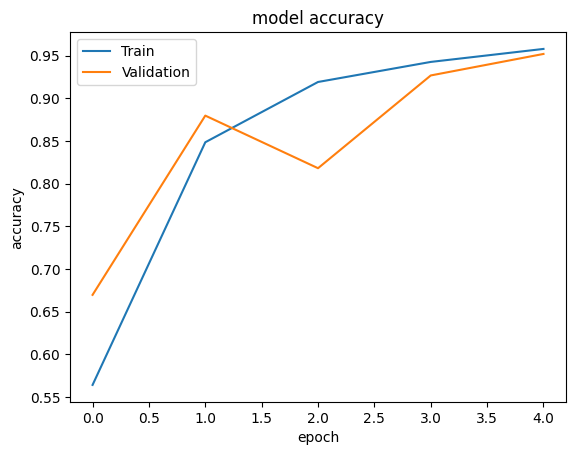

RMSProp



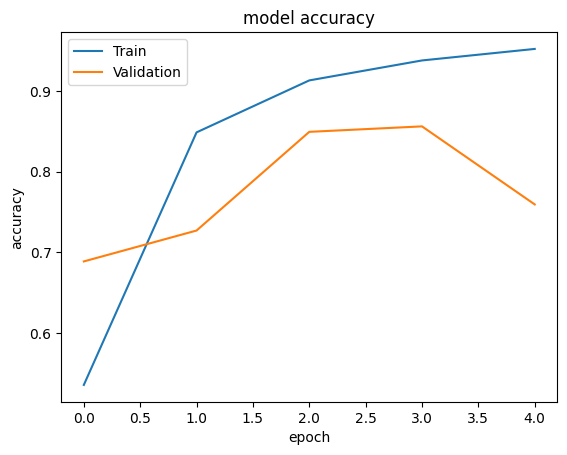

Adadelta



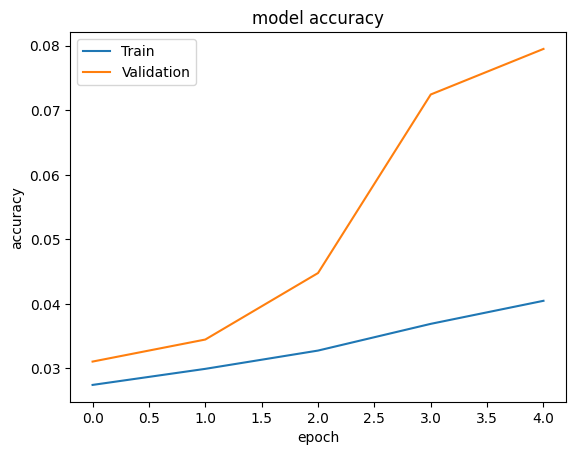

Adagrad



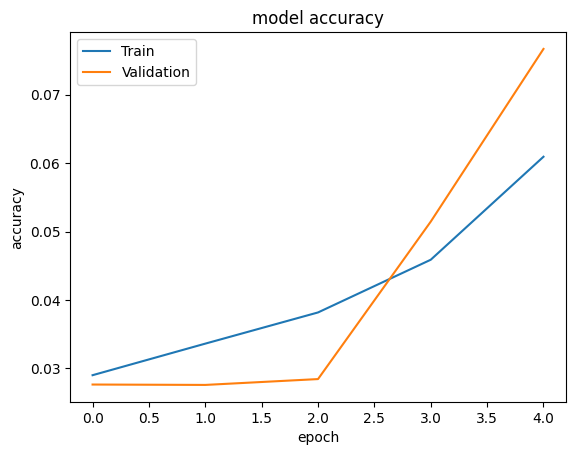

In [34]:
import matplotlib.pyplot as plt

for i in range(len(history)):
    print(optimizer[i])
    print()
    plt.plot(history[i].history['accuracy'])
    plt.plot(history[i].history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Adam



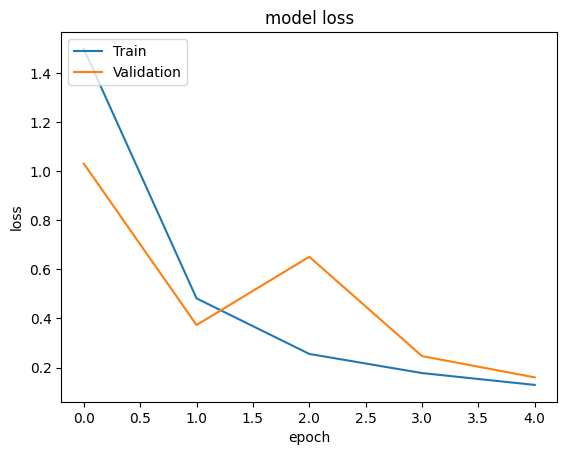

RMSProp



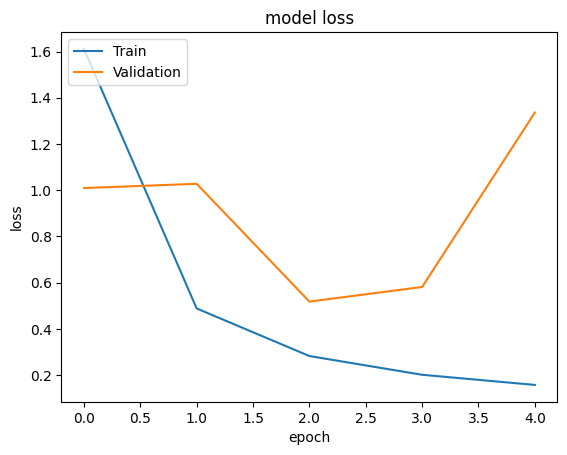

Adadelta



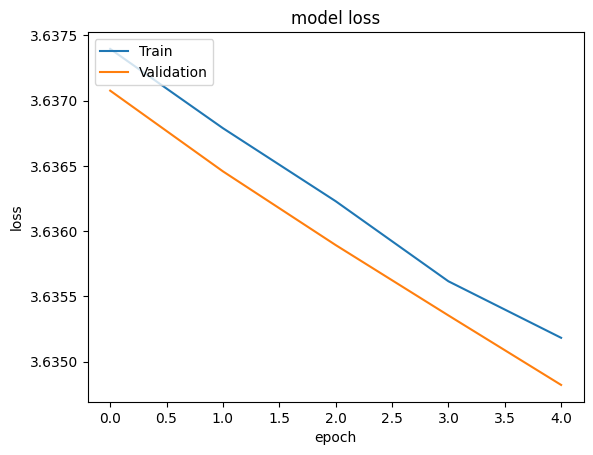

Adagrad



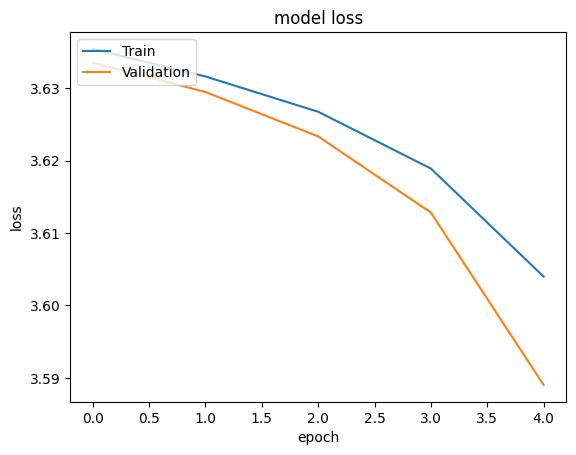

In [35]:
for i in range(len(history)):
    print(optimizer[i])
    print()
    plt.plot(history[i].history['loss'])
    plt.plot(history[i].history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [36]:
test = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))
test = test.map(lambda image,label:(rescale(image),label))

Found 17572 files belonging to 38 classes.


1/1 [==============================] - 0s 123ms/step


<Figure size 2000x500 with 0 Axes>

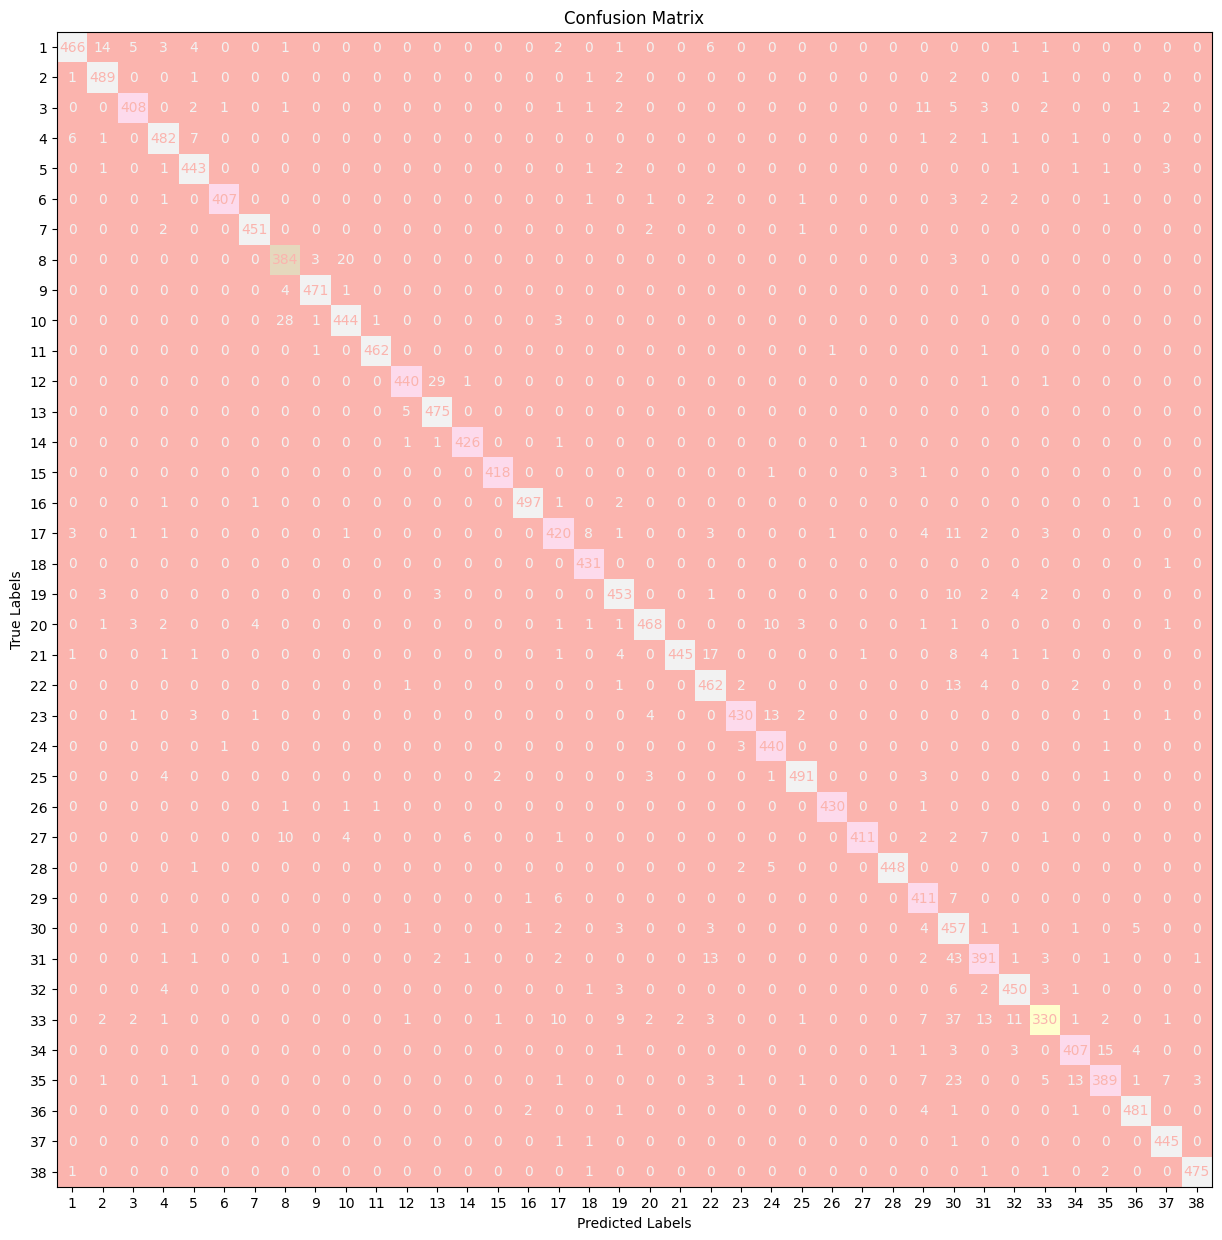

In [37]:
labels = []
predictions = []
precision = []
recall = []
test_accuracy = []


for x,y in test:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_Adam.predict(x),1).numpy())

predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))
test_accuracy.append(accuracy_score(labels, predictions) * 100)
precision.append(precision_score(labels, predictions, average='micro') * 100)
recall.append(recall_score(labels, predictions, average='micro') * 100)

plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'Pastel1')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 0s 132ms/step


<Figure size 2000x500 with 0 Axes>

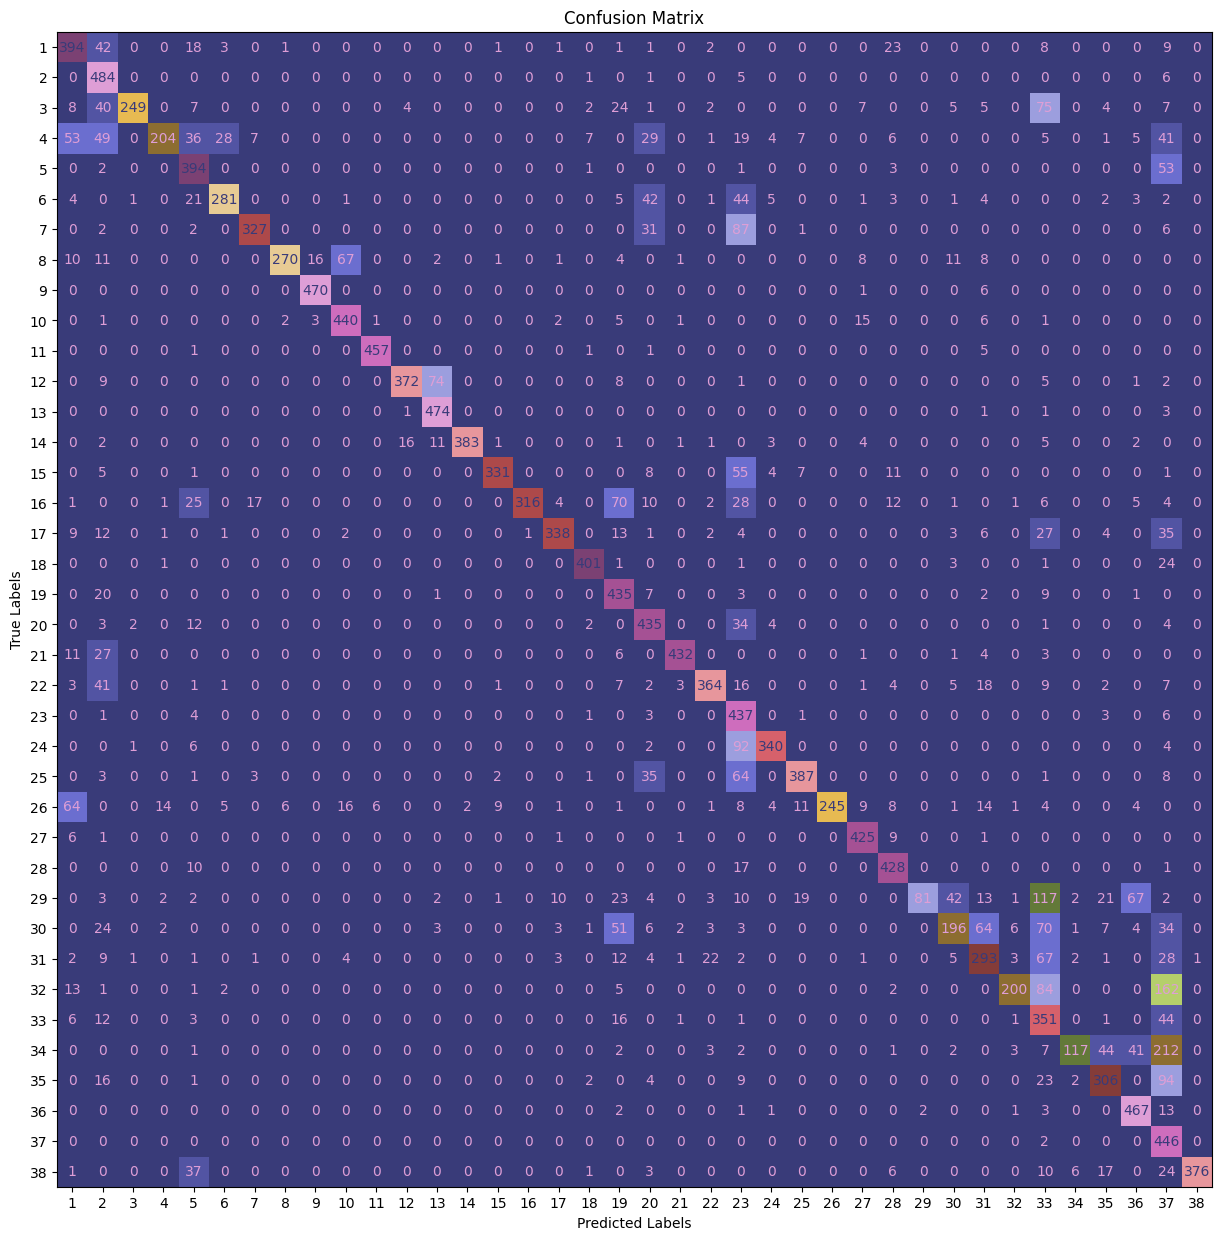

In [38]:
labels = []
predictions = []


for x,y in test:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_RMSprop.predict(x),1).numpy())

predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))
test_accuracy.append(accuracy_score(labels, predictions) * 100)
precision.append(precision_score(labels, predictions, average='micro') * 100)
recall.append(recall_score(labels, predictions, average='micro') * 100)

plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'tab20b')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 0s 130ms/step


<Figure size 2000x500 with 0 Axes>

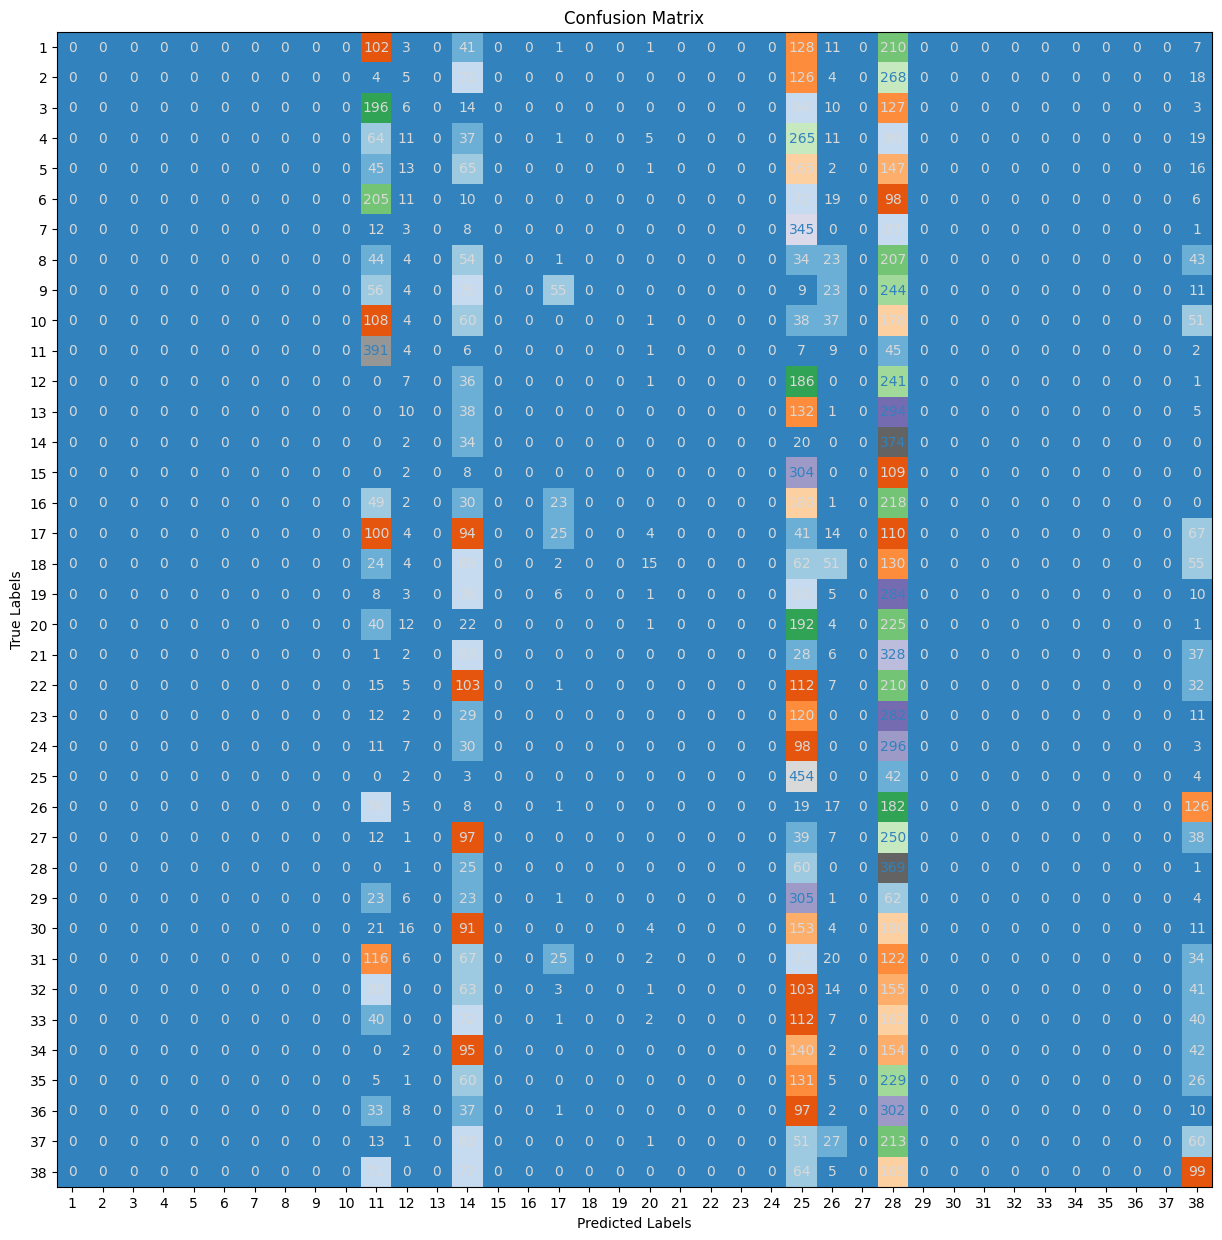

In [39]:
labels = []
predictions = []

for x,y in test:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_Adadelta.predict(x),1).numpy())

predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))
test_accuracy.append(accuracy_score(labels, predictions) * 100)
precision.append(precision_score(labels, predictions, average='micro') * 100)
recall.append(recall_score(labels, predictions, average='micro') * 100)

plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'tab20c')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 0s 122ms/step


<Figure size 2000x500 with 0 Axes>

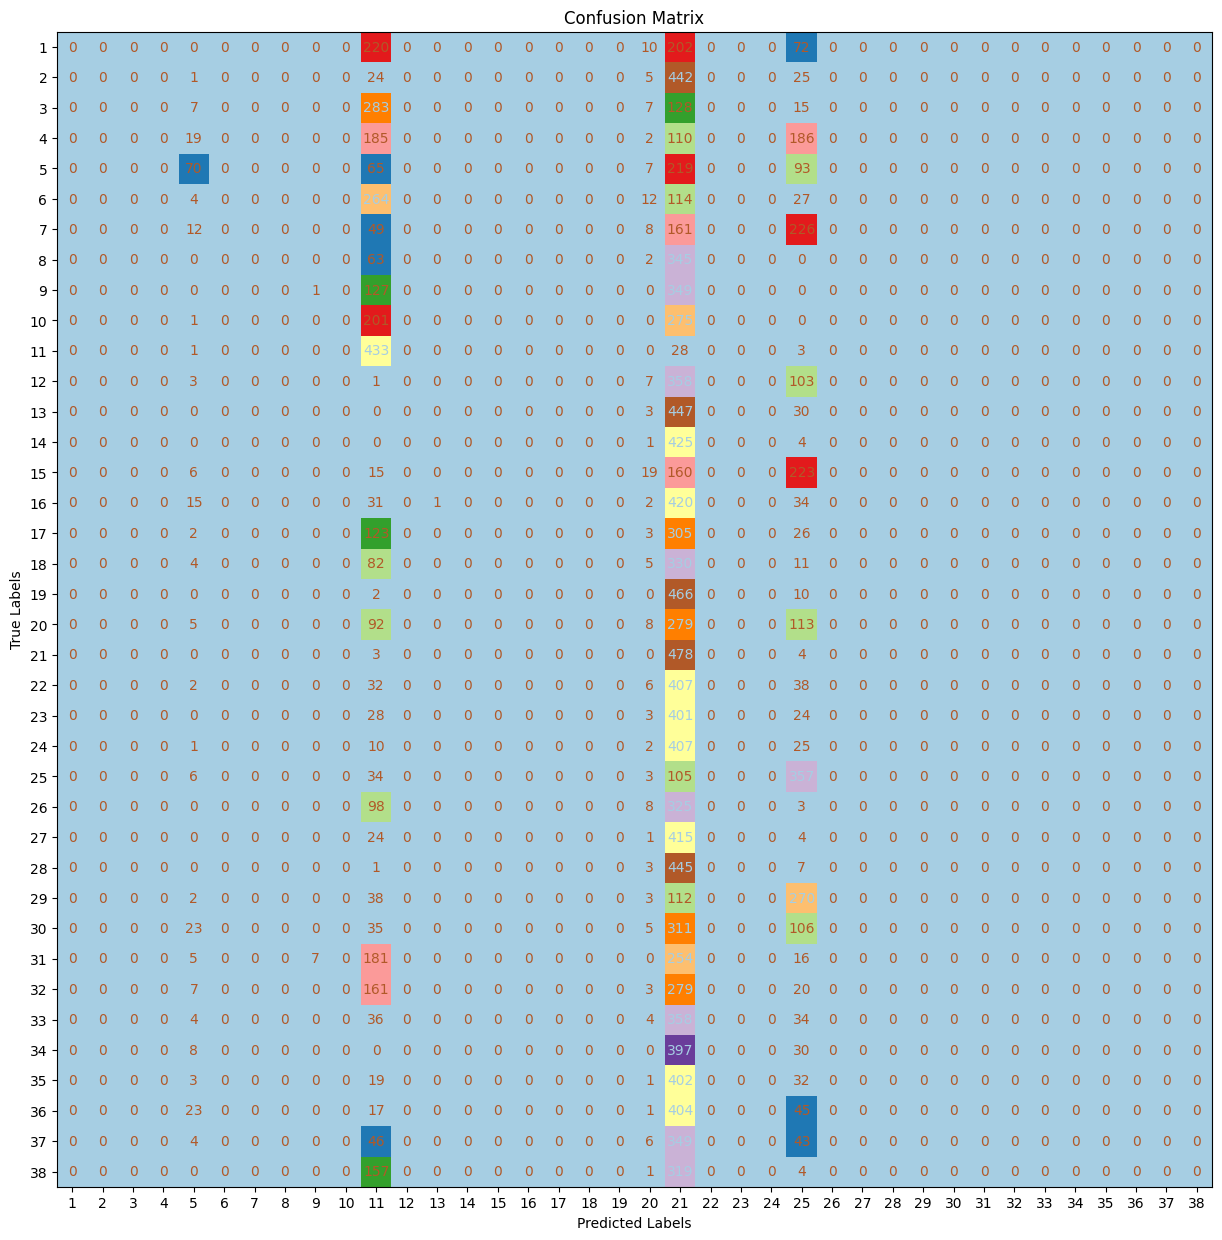

In [40]:
labels = []
predictions = []

for x,y in test:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_Adagrad.predict(x),1).numpy())

predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))
test_accuracy.append(accuracy_score(labels, predictions) * 100)
precision.append(precision_score(labels, predictions, average='micro') * 100)
recall.append(recall_score(labels, predictions, average='micro') * 100)

plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'Paired')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
#testaccuracy,precison,recall graphs wrt to optimizers
def plot_metric(metric_data, title,c):
    plt.figure(figsize=(8, 4))
    plt.bar(optimizer, metric_data, color=c)
    plt.title(title)
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.xlabel('Optimizers')
    plt.tight_layout()
    plt.show()

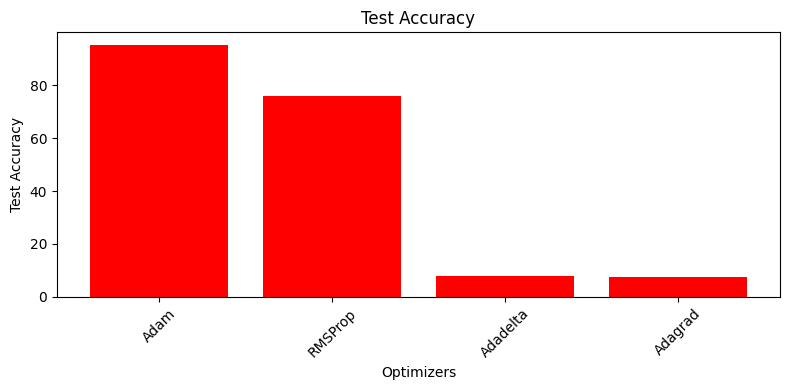

In [42]:
# Plot Test Accuracy
plot_metric(test_accuracy, 'Test Accuracy','red')

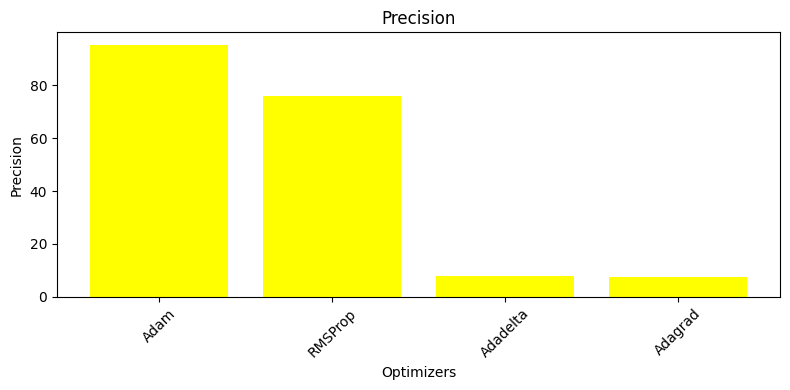

In [45]:
# Plot Precision
plot_metric(precision, 'Precision','yellow')

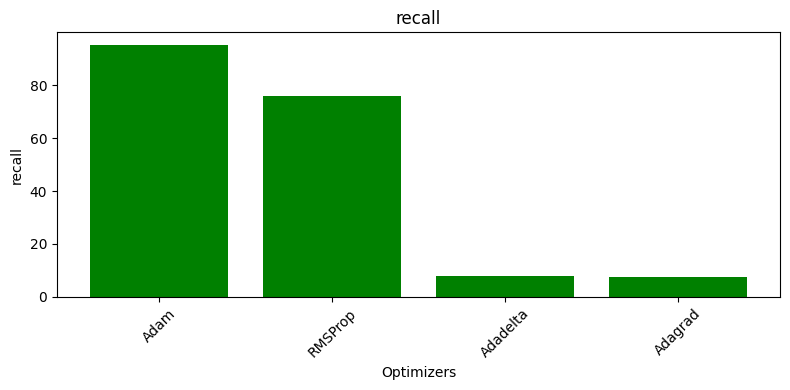

In [44]:
# Plot Precision
plot_metric(recall, 'recall','green')